# Model 

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
hitters = pd.read_csv("hitters.csv")
df = hitters.copy()
df = df.dropna()
y = df["Salary"]
dummies = pd.get_dummies(df[["League","Division","NewLeague"]])
x_ = df.drop(["Salary","League","NewLeague","Division"],axis = 1).astype("float64")
dummies = dummies.drop(["League_A","Division_E","NewLeague_A"],axis = 1).astype("float64")
x = pd.concat([x_,dummies],axis = 1)

In [13]:
x.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1.0,0.0,1.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0.0,1.0,0.0


In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,
                                                 random_state = 42)

In [15]:
from sklearn.linear_model import Lasso

In [16]:
lasso_model = Lasso(alpha = 0.1).fit(x_train,y_train)

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388079, tolerance: 3898.6869563806586
  positive)


In [17]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
lasso_model.coef_

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741409332, tolerance: 3898.6869563806586
  positive)
C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679336369, tolerance: 3898.6869563806586
  positive)
C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.7561375163496, tolerance: 3898.6869563806586
  positive)
C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWar

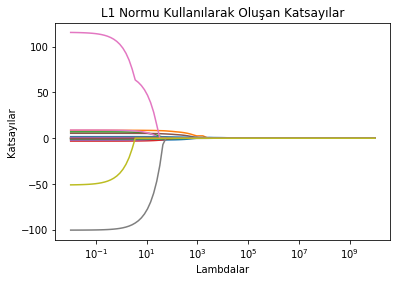

In [24]:
import numpy as np
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5
katsayilar = []
for i in lambdalar:
    lasso.set_params(alpha = i)
    lasso.fit(x_train,y_train)
    katsayilar.append(lasso.coef_)
import matplotlib.pyplot as plt
ax = plt.gca()
ax.plot(lambdalar*2,katsayilar)
ax.set_xscale("log")
plt.axis("tight")
plt.xlabel("Lambdalar")
plt.ylabel("Katsayılar")
plt.title("L1 Normu Kullanılarak Oluşan Katsayılar");

In [25]:
#bu model kurma işleminde lambda değerleri arttıktan sonra çizgi düzleştikten sonra
#katsayıların sıfır olacağını söyleyebiliriz.

# Tahmin

In [27]:
y_tahmin = lasso_model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score
np.sqrt(mean_squared_error(y_test,y_tahmin))

356.75452701487717

In [29]:
r2_score(y_test,y_tahmin)

0.41206469126857637

# Model Tuning 

In [30]:
from sklearn.linear_model import LassoCV

In [52]:
lasso_cvmodel = LassoCV(alphas = None, cv = 10,max_iter = 10000,normalize = True)
#alpha değerine None vermenin nedeni algoritmanın ön tanımlı lambda değerler kümesini kullanarak kullanılması mantıklı olmasıdır.


In [53]:
lasso_cvmodel.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [54]:
lasso_cvmodel.alpha_

0.39406126432470073

In [55]:
lasso_tuneedildi = Lasso(alpha = lasso_cvmodel.alpha_).fit(x_train,y_train)

C:\Users\isaad\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523938, tolerance: 3898.6869563806586
  positive)


In [56]:
y_tahmin_tune = lasso_tuneedildi.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_tahmin_tune))

356.5226376958367

In [57]:
r2_score(y_test,y_tahmin_tune)

0.41282875506652295